<a href="https://colab.research.google.com/github/LorenzoMauri/Advanced-Machine-Learning/blob/main/AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import argparse
import matplotlib.pyplot as plt
from PIL import Image
import os 
from scipy import ndimage
import numpy as np
import time

def createFolder(folder) : 
    if not os.path.exists(folder):
        os.mkdir(folder)
     
      
def rotateImage(image,degree,folderPath):
    im=plt.imread(image)
    rotated = ndimage.rotate(im, degree)
    np.save(folderPath,rotated)


In [109]:
from skimage import transform
def reshape(image,shape):
  return transform.resize(image,shape)

def deleteLastChannel(image):
    return image[:,:,:3]  #tolgo il quarto canale corrispondente alla luminosità, mantenendo i primi 3 


In [29]:
DIR = '/content/drive/MyDrive/progetto_AML/'
os.chdir(DIR)

In [37]:
trainingPath= os.path.join(os.getcwd(),'training/')
testPath= os.path.join(os.getcwd(),'test/')
validationPath= os.path.join(os.getcwd(),'validation/')


In [38]:
trainingPath

'/content/drive/My Drive/progetto_AML/training/'

In [39]:
data_dir = '/content/drive/MyDrive/progetto_AML/dataset'

In [40]:
os.getcwd()

'/content/drive/My Drive/progetto_AML'

#Approccio


1. andare nella directory dei dati 
2. per ogni immagine, trasformo e colloco nel folder opportuno 

In [50]:
%time

import re

def rotate(newFolderName):
   for image in os.listdir():
     if image.endswith(('png','jpg','PNG','JPG')):
      im=plt.imread(image)
      rotated = ndimage.rotate(im, degree)
      np.save(f"{newFolderName+'/'+image}_{newFolderName}",rotated)



os.chdir(data_dir)


 
for degree in [0,90,180,270]:
  newFolderName = f"rotated_{degree}"
  createFolder(newFolderName)
  rotate(newFolderName)
 
        

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 30 µs


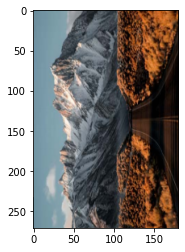

In [48]:
plt.imshow(np.load('/content/drive/MyDrive/progetto_AML/dataset/rotated_90/landscape.PNG_rotated_90.npy'))

In [78]:
im270=np.load('/content/drive/MyDrive/progetto_AML/dataset/rotated_270/landscape.PNG_rotated_270.npy')

In [70]:
im0 = np.load('/content/drive/MyDrive/progetto_AML/dataset/rotated_0/landscape.PNG_rotated_0.npy')


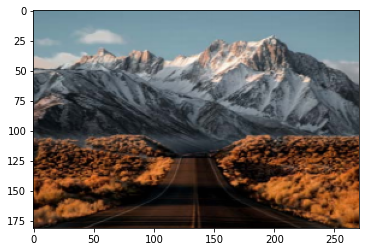

In [53]:
plt.imshow(np.load('/content/drive/MyDrive/progetto_AML/dataset/rotated_0/landscape.PNG_rotated_0.npy'))

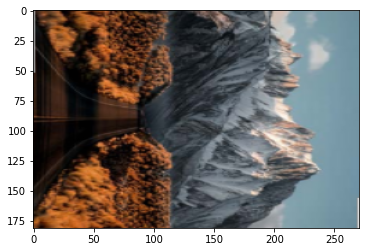

In [83]:
plt.imshow(reshape(im270,im0.shape))


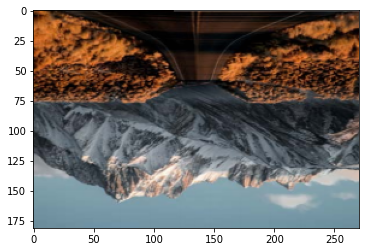

In [97]:
im180=np.load('/content/drive/MyDrive/progetto_AML/dataset/rotated_180/landscape.PNG_rotated_180.npy')
plt.imshow(im180)

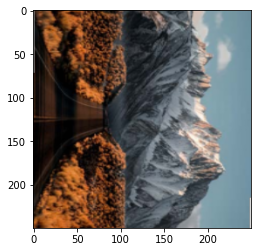

In [115]:
plt.imshow(reshape(im270,(250,250)))

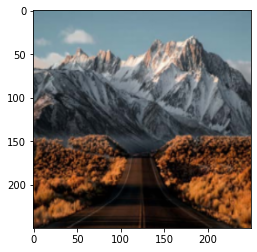

In [112]:
plt.imshow(reshape(im0,(250,250)))